In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
df_c=pd.read_csv('FINAL CALL DATA.csv')
df_c

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163
...,...,...,...,...,...,...,...,...,...,...,...
277006,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778
277007,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164
277008,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698
277009,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689


In [3]:
n = len(df_c)
n_train =  (int)(0.7 * n)
print(n_train)

193907


In [4]:
train = df_c[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [C_IV]', ' [C_GAMMA]', ' [C_VEGA]', ' [C_RHO]', ' [C_DELTA]', ' [C_THETA]']].values
y_train = train[' [C_LAST]'].values

In [5]:
test = df_c[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [C_IV]', ' [C_GAMMA]', ' [C_VEGA]', ' [C_RHO]', ' [C_DELTA]', ' [C_THETA]']].values
y_test = test[' [C_LAST]'].values

In [6]:
from keras.layers import Activation, LeakyReLU, BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard


In [7]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.25))

model.add(Dense(128, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(LeakyReLU())
          
model.compile(loss=('mean_absolute_error'), optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [9]:
callback_es = EarlyStopping(monitor='val_loss', patience=5, verbose=2, restore_best_weights=True)

In [10]:
model.fit(X_train, y_train, batch_size=64, epochs=30, verbose=2, 
          callbacks=[callback_es], validation_data=(X_test, y_test))


Epoch 1/30
3030/3030 - 35s - loss: 7.6748 - mean_absolute_error: 7.6748 - mean_squared_error: 222.0454 - val_loss: 3.4904 - val_mean_absolute_error: 3.4904 - val_mean_squared_error: 36.3112
Epoch 2/30
3030/3030 - 34s - loss: 5.4957 - mean_absolute_error: 5.4957 - mean_squared_error: 101.0941 - val_loss: 5.2011 - val_mean_absolute_error: 5.2011 - val_mean_squared_error: 45.0358
Epoch 3/30
3030/3030 - 33s - loss: 5.3459 - mean_absolute_error: 5.3459 - mean_squared_error: 96.9547 - val_loss: 3.4875 - val_mean_absolute_error: 3.4875 - val_mean_squared_error: 27.1980
Epoch 4/30
3030/3030 - 32s - loss: 5.2793 - mean_absolute_error: 5.2793 - mean_squared_error: 96.3117 - val_loss: 3.3142 - val_mean_absolute_error: 3.3142 - val_mean_squared_error: 24.8363
Epoch 5/30
3030/3030 - 34s - loss: 5.2149 - mean_absolute_error: 5.2149 - mean_squared_error: 94.6184 - val_loss: 4.8755 - val_mean_absolute_error: 4.8755 - val_mean_squared_error: 42.6489
Epoch 6/30
3030/3030 - 34s - loss: 5.0599 - mean_abso

In [11]:
y_train_pred = model.predict(X_train)

In [12]:
y_train_pred=np.ravel(y_train_pred)

In [13]:
train['Call_MLP']=y_train_pred
train

<ipython-input-13-7182497b72b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Call_MLP']=y_train_pred


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_MLP
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476,25.390514
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862,23.244505
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204,21.715122
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256,20.008390
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163,18.628899
...,...,...,...,...,...,...,...,...,...,...,...,...
193902,179.02,1.649425,0.65827,0.00573,0.84465,-0.02014,1.41244,0.28033,32.60,165.0,35.369786,29.002571
193903,179.02,1.649425,0.62671,0.00588,0.87102,-0.02038,1.36556,0.27820,30.90,170.0,32.577601,27.123627
193904,179.02,1.649425,0.59577,0.00612,0.89144,-0.02070,1.31353,0.27681,27.13,175.0,29.994880,25.401539
193905,179.02,1.649425,0.56406,0.00628,0.90553,-0.02039,1.25991,0.27454,24.73,180.0,27.482092,23.608221


In [14]:
y_true=train[' [C_LAST]']
y_pred=train['Call_MLP']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  2.4901530650158303
MSE =  24.656923136043176
RMSE =  4.965573797260814


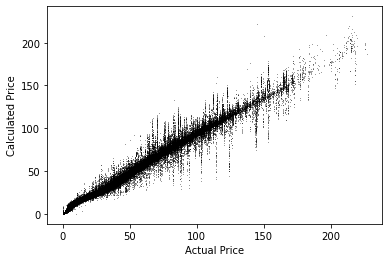

In [15]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

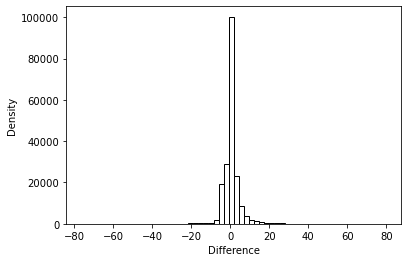

In [16]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [17]:
y_test_pred=model.predict(X_test)

In [18]:
y_test_pred=np.ravel(y_test_pred)

In [19]:
test['Call_MLP']=y_test_pred
test

<ipython-input-19-9bcb9758f35d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Call_MLP']=y_test_pred


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_MLP
193908,179.02,1.649425,0.47056,0.00645,0.91520,-0.02033,1.08559,0.26887,18.55,195.0,20.895615,19.171696
193909,179.02,1.649425,0.44009,0.00641,0.90725,-0.02019,1.02520,0.26711,16.70,200.0,18.986668,17.970112
193910,179.02,1.649425,0.41070,0.00633,0.89419,-0.01936,0.96454,0.26497,14.95,205.0,17.174165,16.789143
193911,179.02,1.649425,0.38230,0.00629,0.87701,-0.01918,0.90546,0.26478,13.60,210.0,15.664548,15.684998
193912,179.02,1.649425,0.35522,0.00610,0.85580,-0.01888,0.84713,0.26322,12.55,215.0,14.150901,14.695660
...,...,...,...,...,...,...,...,...,...,...,...,...
277006,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778,18.246313
277007,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164,13.160501
277008,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698,5.359914
277009,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689,4.552177


In [20]:
y_true=test[' [C_LAST]']
y_pred=test['Call_MLP']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  3.3142104084876784
MSE =  24.836327801576246
RMSE =  4.983605903517677


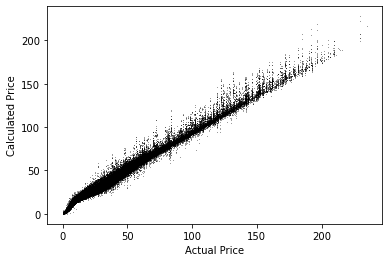

In [21]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

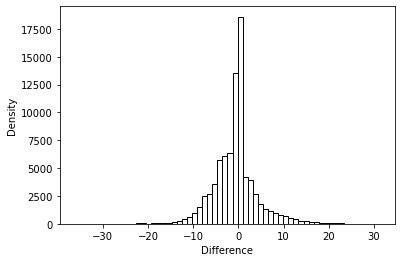

In [22]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [26]:
# train.to_csv('MLP_GREEKS CALL train FINAL Results.csv', mode='a', index=False, header=True)

In [27]:
# test.to_csv('MLP_GREEKS CALL test FINAL Results.csv', mode='a', index=False, header=True)

In [28]:
# model.save('MLP_Call_Greeks.h5')